# Coverage Guided Fuzzer
### Smarter way to create fuzzed input for python program

#### Steps to create the fuzzer

1. We maintain a population (i.e., a list of seeds) that we use for mutation. Each seed in the population will be an input that provide additional coverage information.
2. We will take a seed from the population and fuzz the seed to test the program. If the population is empty, we mutate an initial seed that we provide manually.
3. We take the seed from the population semi-randomly, but the seeds that provided more additional coverage have a higher chance of being selected.
4. If the new input increased the coverage, we add this new input to the population as a new seed. We assign a score to the seed (i.e., how much coverage it improved).
5. We repeat and go back to Step 2 until we execute the fuzzer 100 times (i.e., your pre-defined number of trials).

#### Testing the fuzzer

+  We run our fuzzer on 3 Python programs
    - Differentiate network using Subnet
    - Credit Card Validation
    - RSA Encryption
    
+ Evaluate the programs on different fuzzing approaches:
    - Pure Randomly Fuzzing Approach
    - Semi Randomly Fuzzing Approach
    - Mutation Fuzzing Approach
    - Coverage Guided Fuzzing Approach- smarter way to create fuzzed input

+ We discuss and compare each fuzzing approach in terms of coverage.
+ We plot how the coverage increases for the inputs that we tried.
+ We also record any bug found in our program.

## References

1. https://github.com/geekcomputers/Python


# Differentiate Network using Subnet

#### Description: 

+ This program calculates the network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet from the given IP address and subnet mask.

#### Input: The program takes 2 inputs- 

+ String- IP Address
+ String- Subnet mask

#### Output: 

+ Prints the calculated network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet.
+ If the given IP Address or Subnet mask is invalid, the program will end. 

#### Metrics:

+ SLOC- 69
+ Comments- 34
+ McCabe- 19

In [151]:
import random
import sys
def subnet_calc(ip_address, subnet_mask):

        #Checking IP address validity
    while True:

            #Checking octets            
        a = ip_address.split('.')

        if (len(a) == 4) and (1 <= int(a[0]) <= 223) and (int(a[0]) != 127) and (int(a[0]) != 169 or int(a[1]) != 254) and (0 <= int(a[1]) <= 255 and 0 <= int(a[2]) <= 255 and 0 <= int(a[3]) <= 255):
            break

        else:
            raise ValueError("Invalid IP Address")
            

    masks = [255, 254, 252, 248, 240, 224, 192, 128, 0]

        #Checking Subnet Mask validity
    while True:

            #Checking octets            
        b = subnet_mask.split('.')

        if (len(b) == 4) and (int(b[0]) == 255) and (int(b[1]) in masks) and (int(b[2]) in masks) and (int(b[3]) in masks) and (int(b[0]) >= int(b[1]) >= int(b[2]) >= int(b[3])):
            break

        else:
            raise ValueError("Invalid subnet Mask")

	############# Application #1 - Part #2 #############

        #Algorithm for subnet identification, based on IP and Subnet Mask

        #Convert mask to binary string
    mask_octets_padded = []
    mask_octets_decimal = subnet_mask.split(".")
        #print mask_octets_decimal

    for octet_index in range(0, len(mask_octets_decimal)):

            #print bin(int(mask_octets_decimal[octet_index]))

        binary_octet = bin(int(mask_octets_decimal[octet_index])).split("b")[1]
            #print binary_octet

        if len(binary_octet) == 8:
            mask_octets_padded.append(binary_octet)

        elif len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            mask_octets_padded.append(binary_octet_padded)

        #print mask_octets_padded

    decimal_mask = "".join(mask_octets_padded)
        #print decimal_mask   #Example: for 255.255.255.0 => 11111111111111111111111100000000

        #Counting host bits in the mask and calculating number of hosts/subnet
    no_of_zeros = decimal_mask.count("0")
    no_of_ones = 32 - no_of_zeros
    no_of_hosts = abs(2 ** no_of_zeros - 2) #return positive value for mask /32

        #print no_of_zeros
        #print no_of_ones
        #print no_of_hosts

        #Obtaining wildcard mask
    wildcard_octets = []
    for w_octet in mask_octets_decimal:
        wild_octet = 255 - int(w_octet)
        wildcard_octets.append(str(wild_octet))

        #print wildcard_octets

    wildcard_mask = ".".join(wildcard_octets)
        #print wildcard_mask

        ############# Application #1 - Part #3 #############

        #Convert IP to binary string
    ip_octets_padded = []
    ip_octets_decimal = ip_address.split(".")

    for octet_index in range(0, len(ip_octets_decimal)):

        binary_octet = bin(int(ip_octets_decimal[octet_index])).split("b")[1]

        if len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            ip_octets_padded.append(binary_octet_padded)

        else:
            ip_octets_padded.append(binary_octet)

        #print ip_octets_padded

    binary_ip = "".join(ip_octets_padded)

        #print binary_ip   #Example: for 192.168.2.100 => 11000000101010000000001001100100

        #Obtain the network address and broadcast address from the binary strings obtained above

    network_address_binary = binary_ip[:(no_of_ones)] + "0" * no_of_zeros
        #print network_address_binary

    broadcast_address_binary = binary_ip[:(no_of_ones)] + "1" * no_of_zeros
        #print broadcast_address_binary

    net_ip_octets = []
    for octet in range(0, len(network_address_binary), 8):
        net_ip_octet = network_address_binary[octet:octet+8]
        net_ip_octets.append(net_ip_octet)

        #print net_ip_octets

    net_ip_address = []
    for each_octet in net_ip_octets:
        net_ip_address.append(str(int(each_octet, 2)))

        #print net_ip_address

    network_address = ".".join(net_ip_address)
        #print network_address

    bst_ip_octets = []
    for octet in range(0, len(broadcast_address_binary), 8):
        bst_ip_octet = broadcast_address_binary[octet:octet+8]
        bst_ip_octets.append(bst_ip_octet)

        #print bst_ip_octets

    bst_ip_address = []
    for each_octet in bst_ip_octets:
        bst_ip_address.append(str(int(each_octet, 2)))

        #print bst_ip_address

    broadcast_address = ".".join(bst_ip_address)
        #print broadcast_address

        #Results for selected IP/mask
    print ("\n")
    print("Network address is: %s" % network_address)
    print("Broadcast address is: %s" % broadcast_address)
    print("Number of valid hosts per subnet: %s" % no_of_hosts)
    print("Wildcard mask: %s" % wildcard_mask)
    print("Mask bits: %s" % no_of_ones)
    
    return True



In [33]:
#Calling the function
subnet_calc("1.1.1.1", "255.255.255.0")



Network address is: 1.1.1.0
Broadcast address is: 1.1.1.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


True

In [34]:
def is_valid_ip_subnet(ip_address, subnet_mask):
    try:
        result = subnet_calc(ip_address, subnet_mask)
        return True
    except ValueError:
        return False

## Random Fuzzer for Subnet Calculator

## Concept

+ IP version 4 has 32 bits. It is divided into 4 octets, where each octet consists of 8 bits. To make life easier for humans, these bits are converted into decimals. The bits can either be 0 or 1. So in an octet, it can start with 00000000 or 11111111 which when converted into decimals can be 0 or 255 respectively. The subnet mask helps us to identify the network of an IP. The subnet mask or the IP address cannot exceed 255 in one octet. IP version 4 has 5 classes and based on the classes, it's subnet mask is decided. This particular way of giving subnet mask is called FLSM (Fixed length subnet mask). 

    - Class A- 255.0.0.0
    - Class B- 255.255.0.0
    - Class C- 255.255.255.0

+ We also have VLSM (Variable length subnet mask). It was introduced to reduce the wasteage of IP. The decimal numbers 128, 192, 224, 240, 248, 252 and 254 are also valid if and only if it's previous octet is 255 and it's next octets/octet is 0. Thus the total number of inputs is 256^4 since it is 32 bits, which is approximately 4.9 Billion and the valid input is just 28. 

+ When we use random fuzzing method, we should have higher computation power to try 4.9 Billion trials and system will give output only for 28 trials. 
    
## Random Fuzzer Approach 1

+ When it comes to randomization, in our 1st approach we are going to randomize numbers in all 4 octets. We are planning to 1000 trials. In this case, the chance of getting a valid subnet mask is extremely low. 

## Random Fuzzer Approach 2

+ We are going to do 1000 trials. So, instead of randomizing all the 4 octets we are going to first fix the 3rd and 4th octet as 0 and we are going to randomize only the 1st and 2nd octet. Thus, we will get atleast one desired output in 256 runs which is the maximum. 
+ Similarly we do it for the 2nd, 3rd and 4th octet. By this method, we can atleast have 1 desired output.

In [136]:
#1 Pure Randomly fuzzing Approach for IP address and Subnet mask

# generate random value in the range of 0 to 255

def pure_random_ip_fuzz(int_start=0, int_range=1000):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

In [137]:
pure_random_ip_fuzz()

'567.29.14.640'

In [191]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = pure_random_ip_fuzz()
    input_subnet= pure_random_ip_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 842.324.898.513
input Subet Mask is 935.440.822.590

input IP Address is 359.161.420.609
input Subet Mask is 605.757.833.756

input IP Address is 414.881.860.429
input Subet Mask is 510.247.169.130

input IP Address is 481.380.240.726
input Subet Mask is 948.970.269.762

input IP Address is 223.529.265.538
input Subet Mask is 81.45.422.37

input IP Address is 892.401.683.88
input Subet Mask is 729.215.829.916

input IP Address is 866.72.978.792
input Subet Mask is 463.566.351.408

input IP Address is 949.529.952.769
input Subet Mask is 795.323.634.343

input IP Address is 695.80.153.652
input Subet Mask is 41.447.236.777

input IP Address is 309.204.461.742
input Subet Mask is 321.779.508.953

input IP Address is 826.256.130.553
input Subet Mask is 32.882.405.790

input IP Address is 578.389.448.51
input Subet Mask is 314.890.53.723

input IP Address is 48.244.793.418
input Subet Mask is 499.231.24.709

input IP Address is 54.22.683.381
input Subet Mask is 378.333.9

input IP Address is 22.493.641.795
input Subet Mask is 559.277.918.76

input IP Address is 798.897.53.226
input Subet Mask is 602.715.872.283

input IP Address is 685.535.742.428
input Subet Mask is 993.130.200.948

input IP Address is 892.737.489.118
input Subet Mask is 37.123.214.53

input IP Address is 878.919.484.191
input Subet Mask is 997.408.39.32

input IP Address is 294.421.208.4
input Subet Mask is 640.872.644.680

input IP Address is 438.77.784.257
input Subet Mask is 194.436.895.314

input IP Address is 285.658.184.330
input Subet Mask is 948.247.470.76

input IP Address is 575.620.371.775
input Subet Mask is 260.537.54.588

input IP Address is 488.783.114.916
input Subet Mask is 813.415.681.802

input IP Address is 878.881.970.10
input Subet Mask is 990.978.109.615

input IP Address is 599.377.987.994
input Subet Mask is 430.326.192.883

input IP Address is 51.405.968.982
input Subet Mask is 468.880.897.926

input IP Address is 817.579.854.578
input Subet Mask is 908.754.9


input IP Address is 926.625.973.423
input Subet Mask is 239.950.786.119

input IP Address is 566.646.827.884
input Subet Mask is 919.460.560.396

input IP Address is 789.549.26.334
input Subet Mask is 454.576.672.801

input IP Address is 185.766.509.993
input Subet Mask is 534.554.388.15

input IP Address is 849.817.57.140
input Subet Mask is 985.798.19.686

input IP Address is 30.117.327.17
input Subet Mask is 326.101.869.425

input IP Address is 550.457.110.880
input Subet Mask is 114.783.60.213

input IP Address is 62.2.478.193
input Subet Mask is 27.487.912.792

input IP Address is 670.484.15.976
input Subet Mask is 606.108.428.584

input IP Address is 734.51.242.851
input Subet Mask is 2.825.378.227

input IP Address is 168.162.831.437
input Subet Mask is 553.730.31.606

input IP Address is 785.746.904.17
input Subet Mask is 743.163.96.909

input IP Address is 596.394.207.526
input Subet Mask is 518.639.529.424

input IP Address is 163.398.573.296
input Subet Mask is 328.824.858.

input IP Address is 27.632.321.474
input Subet Mask is 516.284.844.789

input IP Address is 659.650.768.29
input Subet Mask is 598.477.892.686

input IP Address is 675.693.437.901
input Subet Mask is 396.6.311.618

input IP Address is 760.193.924.856
input Subet Mask is 426.661.110.457

input IP Address is 93.157.17.320
input Subet Mask is 818.289.267.260

input IP Address is 616.942.457.935
input Subet Mask is 703.751.527.145

input IP Address is 26.967.341.541
input Subet Mask is 41.998.528.361

input IP Address is 361.180.42.319
input Subet Mask is 500.74.735.901

input IP Address is 7.899.367.973
input Subet Mask is 318.253.94.421

input IP Address is 867.443.723.804
input Subet Mask is 616.525.999.926

input IP Address is 785.202.281.927
input Subet Mask is 333.112.524.398

input IP Address is 134.753.993.955
input Subet Mask is 930.206.566.531

input IP Address is 474.189.183.626
input Subet Mask is 820.675.67.622

input IP Address is 901.768.413.806
input Subet Mask is 120.33.72

input IP Address is 771.448.236.396
input Subet Mask is 218.843.55.393

input IP Address is 721.988.431.298
input Subet Mask is 386.486.557.243

input IP Address is 264.392.123.394
input Subet Mask is 375.411.896.464

input IP Address is 400.535.141.819
input Subet Mask is 822.221.750.46

input IP Address is 455.508.627.740
input Subet Mask is 513.252.896.173

input IP Address is 946.574.604.7
input Subet Mask is 925.490.590.883

input IP Address is 346.818.445.577
input Subet Mask is 307.314.42.195

input IP Address is 622.588.215.837
input Subet Mask is 534.775.717.643

input IP Address is 218.468.285.269
input Subet Mask is 805.296.907.621

input IP Address is 899.765.907.786
input Subet Mask is 596.205.478.343

input IP Address is 207.686.536.481
input Subet Mask is 401.861.724.860

input IP Address is 186.873.332.405
input Subet Mask is 15.529.7.933

input IP Address is 426.195.968.328
input Subet Mask is 616.661.532.602

input IP Address is 626.249.823.361
input Subet Mask is 731

0.0

### Result- IP will be valid while subnet mask is invalid

+ So in the next random approach, we will restructure the subnet mask fuzz algorithm

In [167]:
#2 Semi Randomly fuzzing approach for Subnet mask

# generate random value in the range of 0 to 255

def semi_random_ip_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

def semi_random_subnet_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,2):
        ip+=str(random.randrange(int_start, int_start+int_range))
        ip+="."
    ip+="0.0"
    return ip

In [169]:
semi_random_subnet_fuzz()


'207.37.0.0'

In [192]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = semi_random_ip_fuzz()
    input_subnet= semi_random_subnet_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 218.109.64.207
input Subet Mask is 162.142.0.0

input IP Address is 250.25.232.41
input Subet Mask is 246.220.0.0

input IP Address is 214.140.119.66
input Subet Mask is 202.76.0.0

input IP Address is 138.51.252.244
input Subet Mask is 56.216.0.0

input IP Address is 160.195.134.151
input Subet Mask is 240.123.0.0

input IP Address is 26.32.237.254
input Subet Mask is 146.83.0.0

input IP Address is 90.230.162.106
input Subet Mask is 14.83.0.0

input IP Address is 116.93.47.70
input Subet Mask is 52.129.0.0

input IP Address is 32.32.116.197
input Subet Mask is 114.202.0.0

input IP Address is 97.51.47.106
input Subet Mask is 82.10.0.0

input IP Address is 128.236.12.243
input Subet Mask is 94.155.0.0

input IP Address is 174.240.107.211
input Subet Mask is 59.108.0.0

input IP Address is 190.182.165.30
input Subet Mask is 72.87.0.0

input IP Address is 120.145.111.132
input Subet Mask is 10.38.0.0

input IP Address is 220.153.55.57
input Subet Mask is 217.125.0.0


input Subet Mask is 223.167.0.0

input IP Address is 247.204.16.29
input Subet Mask is 193.61.0.0

input IP Address is 112.178.203.96
input Subet Mask is 185.92.0.0

input IP Address is 230.170.229.122
input Subet Mask is 224.22.0.0

input IP Address is 237.124.15.142
input Subet Mask is 187.89.0.0

input IP Address is 32.112.134.30
input Subet Mask is 132.50.0.0

input IP Address is 156.15.188.136
input Subet Mask is 151.96.0.0

input IP Address is 45.138.64.55
input Subet Mask is 40.240.0.0

input IP Address is 107.253.227.155
input Subet Mask is 9.173.0.0

input IP Address is 225.225.190.174
input Subet Mask is 204.222.0.0

input IP Address is 81.144.37.214
input Subet Mask is 138.145.0.0

input IP Address is 104.17.150.192
input Subet Mask is 96.9.0.0

input IP Address is 57.63.230.177
input Subet Mask is 70.75.0.0

input IP Address is 19.26.249.47
input Subet Mask is 182.0.0.0

input IP Address is 16.151.146.136
input Subet Mask is 249.214.0.0

input IP Address is 202.60.10.177
in


input IP Address is 8.166.58.27
input Subet Mask is 84.33.0.0

input IP Address is 35.112.15.135
input Subet Mask is 8.137.0.0

input IP Address is 93.217.60.35
input Subet Mask is 181.57.0.0

input IP Address is 194.171.221.212
input Subet Mask is 146.37.0.0

input IP Address is 174.155.129.25
input Subet Mask is 220.181.0.0

input IP Address is 254.71.190.145
input Subet Mask is 54.15.0.0

input IP Address is 123.146.87.226
input Subet Mask is 35.217.0.0

input IP Address is 76.221.179.100
input Subet Mask is 156.177.0.0

input IP Address is 151.208.22.35
input Subet Mask is 51.36.0.0

input IP Address is 16.22.159.182
input Subet Mask is 226.17.0.0

input IP Address is 249.139.172.98
input Subet Mask is 57.30.0.0

input IP Address is 149.141.239.151
input Subet Mask is 93.85.0.0

input IP Address is 187.73.30.242
input Subet Mask is 127.88.0.0

input IP Address is 85.47.82.32
input Subet Mask is 168.136.0.0

input IP Address is 251.1.205.2
input Subet Mask is 99.18.0.0

input IP Ad

input Subet Mask is 255.66.0.0

input IP Address is 181.52.0.254
input Subet Mask is 200.21.0.0

input IP Address is 98.8.59.186
input Subet Mask is 134.174.0.0

input IP Address is 139.62.133.12
input Subet Mask is 118.52.0.0

input IP Address is 177.148.53.244
input Subet Mask is 134.61.0.0

input IP Address is 100.237.70.34
input Subet Mask is 37.133.0.0

input IP Address is 146.211.254.48
input Subet Mask is 163.154.0.0

input IP Address is 51.236.119.239
input Subet Mask is 235.22.0.0

input IP Address is 41.69.2.107
input Subet Mask is 71.135.0.0

input IP Address is 166.27.169.9
input Subet Mask is 158.40.0.0

input IP Address is 217.20.60.169
input Subet Mask is 26.230.0.0

input IP Address is 108.177.204.10
input Subet Mask is 222.25.0.0

input IP Address is 208.17.174.85
input Subet Mask is 174.78.0.0

input IP Address is 157.131.168.37
input Subet Mask is 223.177.0.0

input IP Address is 104.127.89.101
input Subet Mask is 27.237.0.0

input IP Address is 90.25.90.201
input Su

0.001

+ pure random fuzzer- ip address might be valid but subnet mask will be invalid for the 1000 trials. Even if we increase the trials 10 times, it will not make any difference.
+ semi random fuzzer- ip address will be valid all the time and we are going to set the 3rd and 4th octet to 0 and randomize 1st and 2nd octet between 0 to 255. With 1000 trials, the probability of getting a valid subnet mask is very low but we can get . If we increase the trials to 10000, we have a better chance of finding a valid subnet mask. 

## Mutation Fuzzer for Subnet Calculator

In [345]:
# mutator fuzzing approach for IP and Subnet

class Network_Fuzzer:
    def ip_add(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        random_integer = str(random.randrange(0, 10)) # changed the char to integer from 0 to 255
        octets[octet]=octets[octet][:pos] + random_integer + octets[octet][pos:]
        return ".".join(octets)
    
    def ip_remove(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        # remove value at pos
        octets[octet]=octets[octet][:pos] + octets[octet][pos+1:]
        return ".".join(octets)
    
    def ip_flip(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #convert to binary
        binary_octet='{0:08b}'.format(int(octets[octet]))
        #flip a random bit
        pos=random.randint(0,len(binary_octet)-1)
        flipped_bit=str(1- int(binary_octet[pos]))
        binary_octet=binary_octet[:pos] + flipped_bit + binary_octet[pos + 1:]
        octets[octet]= int(binary_octet,2)
        return ".".join(map(str, octets))
        
    def fuzz_ip(s):
        mutators = [Network_Fuzzer.ip_add, Network_Fuzzer.ip_remove, Network_Fuzzer.ip_flip]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)

        

In [346]:
# Network_Fuzzer.ip_add("127.0.0.1")
# Network_Fuzzer.ip_remove("127.0.0.1")
Network_Fuzzer.ip_flip("127.0.0.1")


'127.16.0.1'

In [350]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = Network_Fuzzer.fuzz_ip("182.168.100.124")
    input_subnet= Network_Fuzzer.fuzz_ip("255.255.0.0")
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 182.68.100.124
input Subet Mask is 255.255.0.20

input IP Address is 182.16.100.124
input Subet Mask is 255.255.0.

input IP Address is 1802.168.100.124
input Subet Mask is 255.255.0.32

input IP Address is 182.1568.100.124
input Subet Mask is 4255.255.0.0

input IP Address is 182.168.100.12
input Subet Mask is 2585.255.0.0

input IP Address is 12.168.100.124
input Subet Mask is 253.255.0.0

input IP Address is 182.168.96.124
input Subet Mask is 255.255.70.0

input IP Address is 182.168.100.14
input Subet Mask is 2535.255.0.0

input IP Address is 1282.168.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.168.100.1224
input Subet Mask is 255.239.0.0

input IP Address is 182.168.102.124
input Subet Mask is 255.253.0.0

input IP Address is 182.168.100.60
input Subet Mask is 255.55.0.0

input IP Address is 182.168.100.12
input Subet Mask is 255.255.20.0

input IP Address is 6182.168.100.124
input Subet Mask is 255.255.0.128

input IP Address is 182.16.100.

input IP Address is 182.168.100.14
input Subet Mask is 255.255.0.50

input IP Address is 182.16.100.124
input Subet Mask is 255.255..0

input IP Address is 178.168.100.124
input Subet Mask is 25.255.0.0

input IP Address is 182.169.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.18.100.124
input Subet Mask is 255.255..0

input IP Address is 182.68.100.124
input Subet Mask is 223.255.0.0

input IP Address is 12.168.100.124
input Subet Mask is 255.2355.0.0

input IP Address is 183.168.100.124
input Subet Mask is 8255.255.0.0

input IP Address is 182.172.100.124
input Subet Mask is 255.255.4.0

input IP Address is 182.168.100.14
input Subet Mask is 255.255.70.0

input IP Address is 182.168.100.116
input Subet Mask is 255.255..0

input IP Address is 182.168.100.12
input Subet Mask is 255.255..0

input IP Address is 182.168.1100.124
input Subet Mask is 191.255.0.0

input IP Address is 182.168.116.124
input Subet Mask is 255.255.30.0

input IP Address is 182.6168.100.124
inpu

input Subet Mask is 55.255.0.0

input IP Address is 182.168.68.124
input Subet Mask is 255.255.90.0

input IP Address is 182.168.100.116
input Subet Mask is 255.255.0.128

input IP Address is 182.168.100.9124
input Subet Mask is 25.255.0.0

input IP Address is 182.168.100.24
input Subet Mask is 255.255.64.0

input IP Address is 182.168.228.124
input Subet Mask is 255.255..0

input IP Address is 182.1688.100.124
input Subet Mask is 251.255.0.0

input IP Address is 182.1668.100.124
input Subet Mask is 255.255..0

input IP Address is 182.168.00.124
input Subet Mask is 2535.255.0.0

input IP Address is 1082.168.100.124
input Subet Mask is 3255.255.0.0

input IP Address is 182.168.100.12
input Subet Mask is 255.255.70.0

input IP Address is 182.168.228.124
input Subet Mask is 255.255..0

input IP Address is 182.168.100.60
input Subet Mask is 2545.255.0.0

input IP Address is 182.18.100.124
input Subet Mask is 255.2535.0.0

input IP Address is 182.168.116.124
input Subet Mask is 255.255..0



input IP Address is 182.168.10.124
input Subet Mask is 25.255.0.0

input IP Address is 182.168.108.124
input Subet Mask is 255.2455.0.0

input IP Address is 182.168.116.124
input Subet Mask is 255.255.0.

input IP Address is 182.16.100.124
input Subet Mask is 255.2455.0.0

input IP Address is 182.136.100.124
input Subet Mask is 55.255.0.0

input IP Address is 182.68.100.124
input Subet Mask is 255.255..0

input IP Address is 183.168.100.124
input Subet Mask is 251.255.0.0

input IP Address is 182.184.100.124
input Subet Mask is 255.191.0.0

input IP Address is 12.168.100.124
input Subet Mask is 25.255.0.0

input IP Address is 12.168.100.124
input Subet Mask is 2455.255.0.0

input IP Address is 166.168.100.124
input Subet Mask is 255.255.0.

input IP Address is 182.168.100.9124
input Subet Mask is 255.255.30.0

input IP Address is 12.168.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.168.100.12
input Subet Mask is 255.2155.0.0

input IP Address is 182.168.100.116
input 

0.025

## Coverage Guided Fuzzer for Subnet Calculator

In [91]:
from fuzzingbook.Coverage import Coverage

input_ip = pure_random_ip_fuzz()
input_subnet= pure_random_ip_fuzz()

with Coverage() as cov:
    is_valid_ip_subnet(input_ip, input_subnet)
    
[c for c in cov.coverage()]

[('is_valid_ip_subnet', 2),
 ('subnet_calc', 26),
 ('is_valid_ip_subnet', 3),
 ('subnet_calc', 21),
 ('__exit__', 237),
 ('subnet_calc', 9),
 ('is_valid_ip_subnet', 5),
 ('subnet_calc', 11),
 ('subnet_calc', 30),
 ('is_valid_ip_subnet', 6),
 ('subnet_calc', 18),
 ('subnet_calc', 24),
 ('subnet_calc', 6),
 ('subnet_calc', 12)]

In [84]:
def calculate_cumulative_coverage(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp["ip"],inp["subnet"])
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [87]:
trials = 20

population = []
for i in range(0, trials):
    population.append({"ip":pure_random_ip_fuzz(),"subnet":pure_random_ip_fuzz()})

cumulative_coverage = calculate_cumulative_coverage(population, is_valid_ip_subnet)
cumulative_coverage

[14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15]

Text(0, 0.5, 'lines covered')

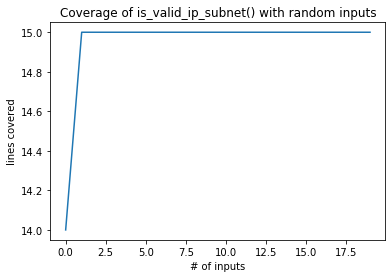

In [92]:
# Plot for pure random approach

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Smarter Fuzzer for Subnet Calculator


# Credit Card Validator

In [ ]:
# luhn algorithm


class CreditCard:
    def __init__(self, card_no):
        self.card_no = card_no

    @property
    def company(self):
        comp = None
        if str(self.card_no).startswith('4'):
            comp = 'Visa Card'
        elif str(self.card_no).startswith(('50', '67', '58', '63',)):
            comp = 'Maestro Card'
        elif str(self.card_no).startswith('5'):
            comp = 'Master Card'
        elif str(self.card_no).startswith('37'):
            comp = 'American Express Card'
        elif str(self.card_no).startswith('62'):
            comp = 'Unionpay Card'
        elif str(self.card_no).startswith('6'):
            comp = 'Discover Card'
        elif str(self.card_no).startswith('35'):
            comp = 'JCB Card'
        elif str(self.card_no).startswith('7'):
            comp = 'Gasoline Card'

        return 'Company : ' + comp

    def first_check(self):
        if 13 <= len(self.card_no) <= 19:
            message = "First check : Valid in terms of length."

        else:
            message = "First check : Check Card number once again it must be of 13 or 16 digits long."
        return message

    def validate(self):
        # double every second digit from right to left
        sum_ = 0
        crd_no = self.card_no[::-1]
        for i in range(len(crd_no)):
            if i % 2 == 1:
                double_it = int(crd_no[i]) * 2

                if len(str(double_it)) == 2:
                    sum_ += sum([eval(i) for i in str(double_it)])

                else:
                    sum_ += double_it

            else:
                sum_ += int(crd_no[i])

        if sum_ % 10 == 0:
            response = "Valid Card"
        else:
            response = 'Invalid Card'

        return response

    @property
    def checksum(self):
        return '#CHECKSUM# : ' + self.card_no[-1]

    @classmethod
    def set_card(cls, card_to_check):
        return cls(card_to_check)


card_number = input()
card = CreditCard.set_card(card_number)
print(card.company)
print('Card : ', card.card_no)
print(card.first_check())
print(card.checksum)
print(card.validate())

# 79927398713
# 4388576018402626
# 379354508162306


# RSA algorithm

In [10]:

import random
max_PrimLength = 1000000000000

'''
calculates the modular inverse from e and phi
'''
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

'''
calculates the gcd of two ints
'''
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

'''
checks if a number is a prime
'''
def is_prime(num):
    if num == 2:
        return True
    if num < 2 or num % 2 == 0:
        return False
    for n in range(3, int(num**0.5)+2, 2):
        if num % n == 0:
            return False
    return True

def generateRandomPrim():
    while(1):
        ranPrime = random.randint(0,max_PrimLength)
        if is_prime(ranPrime):
            return ranPrime

def generate_keyPairs():
    p = generateRandomPrim()
    q = generateRandomPrim()
    
    n = p*q
    print("n ",n)
    '''phi(n) = phi(p)*phi(q)'''
    phi = (p-1) * (q-1) 
    print("phi ",phi)
    
    '''choose e coprime to n and 1 > e > phi'''    
    e = random.randint(1, phi)
    g = gcd(e,phi)
    while g != 1:
        e = random.randint(1, phi)
        g = gcd(e, phi)
        
    print("e=",e," ","phi=",phi)
    '''d[1] = modular inverse of e and phi'''
    d = egcd(e, phi)[1]
    
    '''make sure d is positive'''
    d = d % phi
    if(d < 0):
        d += phi
        
    return ((e,n),(d,n))
        
def decrypt(ctext,private_key):
    try:
        key,n = private_key
        text = [chr(pow(char,key,n)) for char in ctext]
        return "".join(text)
    except TypeError as e:
        print(e)

def encrypt(text,public_key):
    key,n = public_key
    ctext = [pow(ord(char),key,n) for char in text]
    return ctext

if __name__ == '__main__':
    public_key,private_key = generate_keyPairs() 
    print("Public: ",public_key)
    print("Private: ",private_key)
    
    ctext = encrypt("Heya",public_key)
    print("encrypted  =",ctext)
    plaintext = decrypt(ctext, private_key)
    print("decrypted =",plaintext)

n  72917873361068952384803
phi  72917873360523426507048
e= 67262308119153331459999   phi= 72917873360523426507048
Public:  (67262308119153331459999, 72917873361068952384803)
Private:  (67531184136529517005663, 72917873361068952384803)
encrypted  = [24212264725635597495479, 47638346824408407688492, 48512034843472012381990, 40080404889542166675623]
decrypted = Heya
